1.Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2.Loading the Dataset

In [ ]:
df = pd.read_csv('/content/Copy of bankruptcy-prevention.csv')

3.Dataset Details

In [ ]:
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe()

industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000          0.500000         0.500000  
75%        1.000000          1.000000         1.000000  
max        1.000000          1.000000         1.000000

* Missing values check

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(147)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Target variable

In [ ]:
df['class'].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower) | (df[col] > upper)]
  print(f"{col}: {len(outliers)} outliers")


industrial_risk: 0 outliers
management_risk: 0 outliers
financial_flexibility: 0 outliers
credibility: 0 outliers
competitiveness: 0 outliers
operating_risk: 0 outliers


In [ ]:
summary = df.describe()
summary = summary.loc[['mean', 'std']]
numeric_cols = df.select_dtypes(include=np.number)
summary.loc['median'] = numeric_cols.median()
summary.loc['IQR'] = numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25)
print(summary)

        industrial_risk  management_risk  financial_flexibility  credibility  \
mean           0.485437         0.563107               0.504854     0.582524   
std            0.404971         0.412308               0.405206     0.377668   
median         0.500000         0.500000               0.500000     0.500000   
IQR            1.000000         1.000000               1.000000     0.500000   

        competitiveness  operating_risk  
mean           0.640777        0.514563  
std            0.410747        0.439788  
median         1.000000        0.500000  
IQR            0.500000        1.000000  


4.EDA

* Count Plots

1. Class Distribution Chart



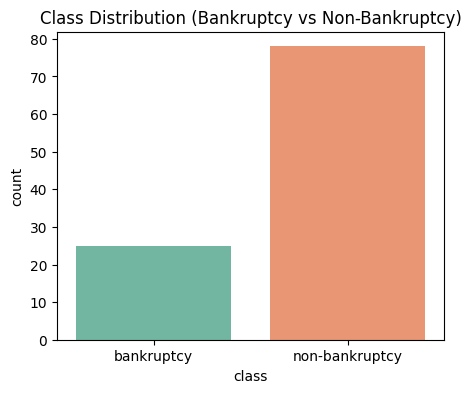

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Bankruptcy vs Non-Bankruptcy)")
plt.show()

The number of companies in each category of the target variable (bankruptcy vs non-bankruptcy).

2. Feature Distribution by Class

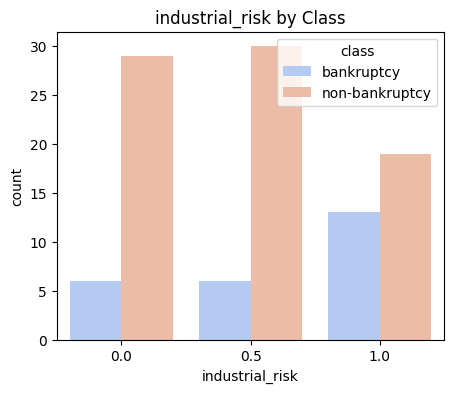

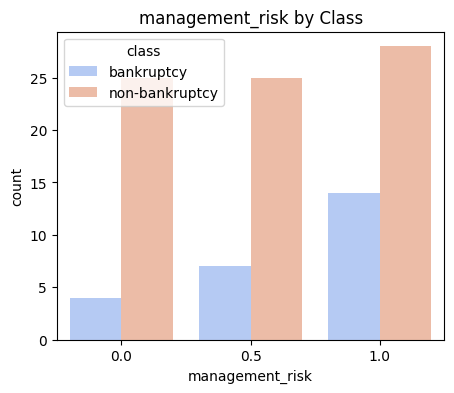

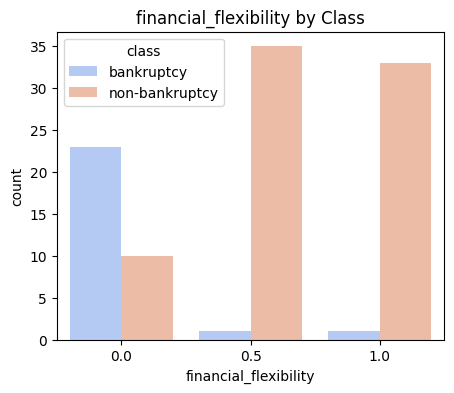

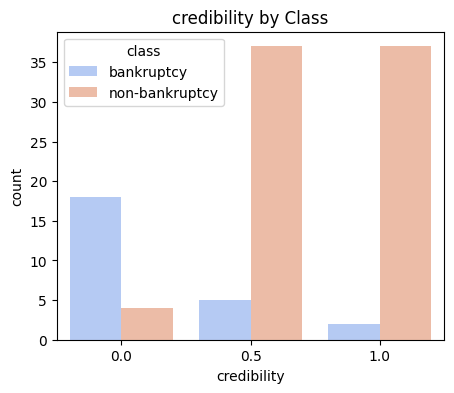

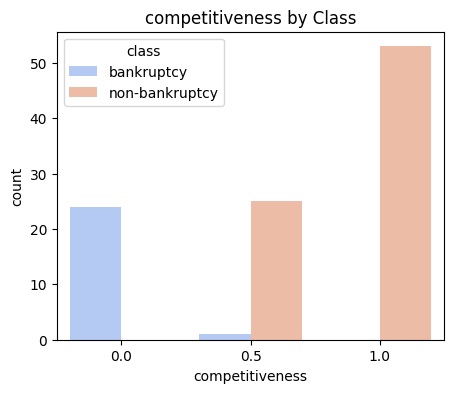

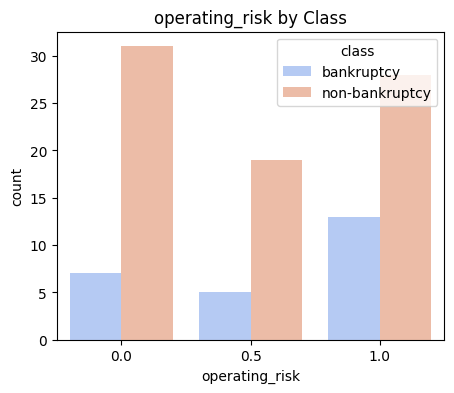

In [ ]:
features = [col for col in df.columns if col != 'class']

for feature in features:
    plt.figure(figsize=(5,4))
    sns.countplot(x=feature, hue='class', data=df, palette='coolwarm')
    plt.title(f"{feature} by Class")
    plt.show()

For each risk factor (industrial_risk, management_risk, etc.), we see how many companies fall into each level (0, 0.5, 1) split by bankruptcy status.

Histograms

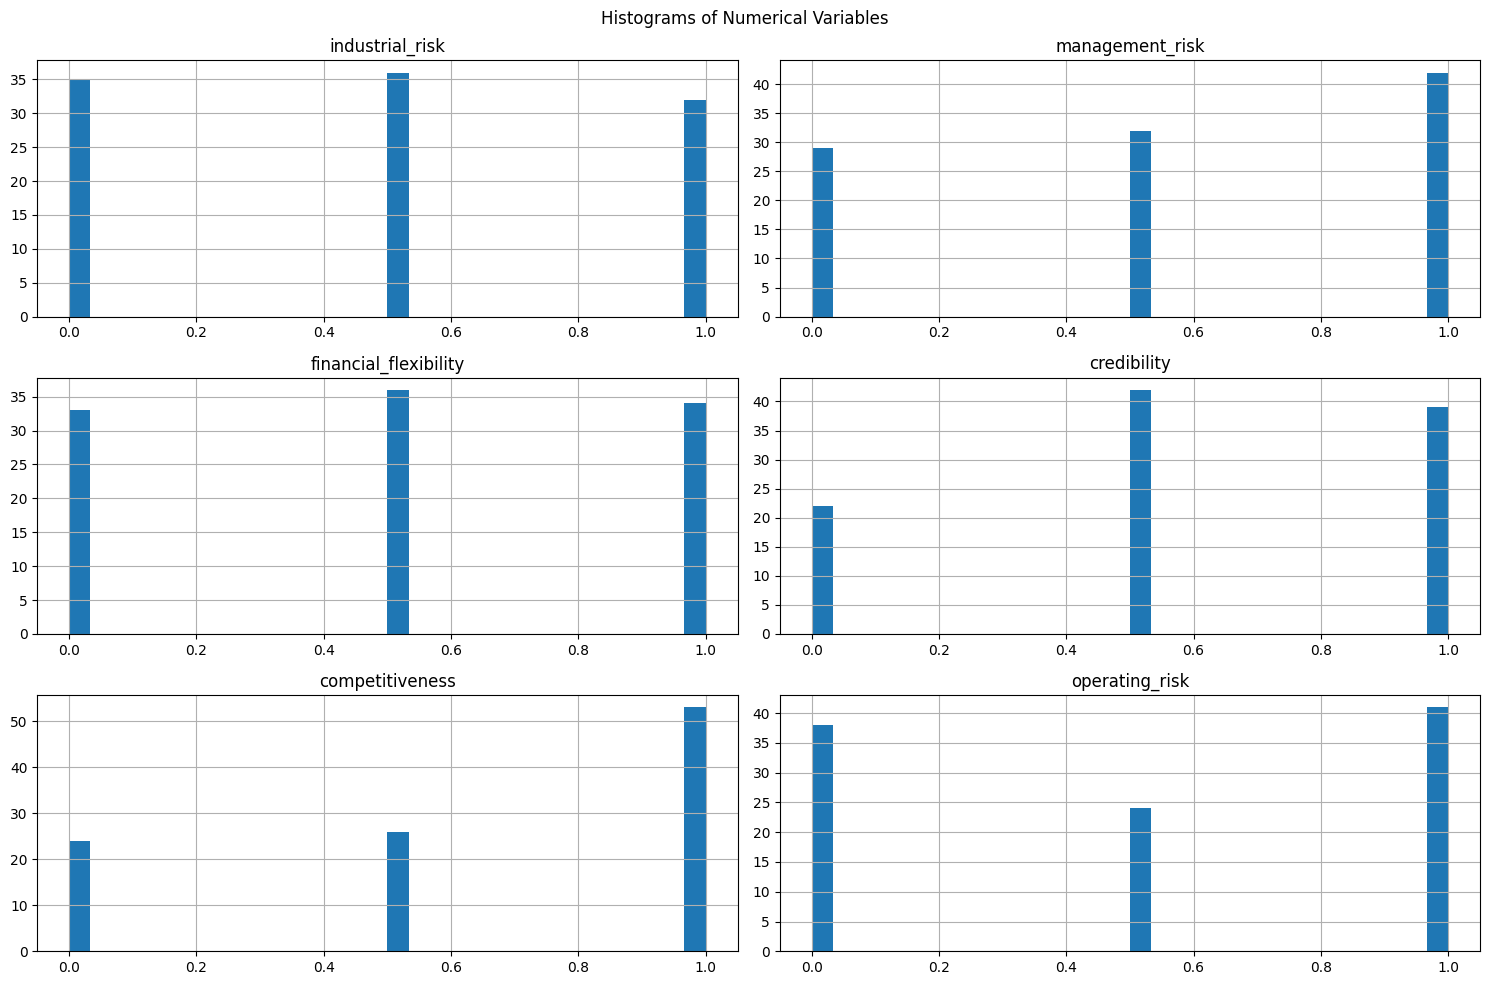

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

It providing a visual summary of the distribution of numerical features.

Boxplots

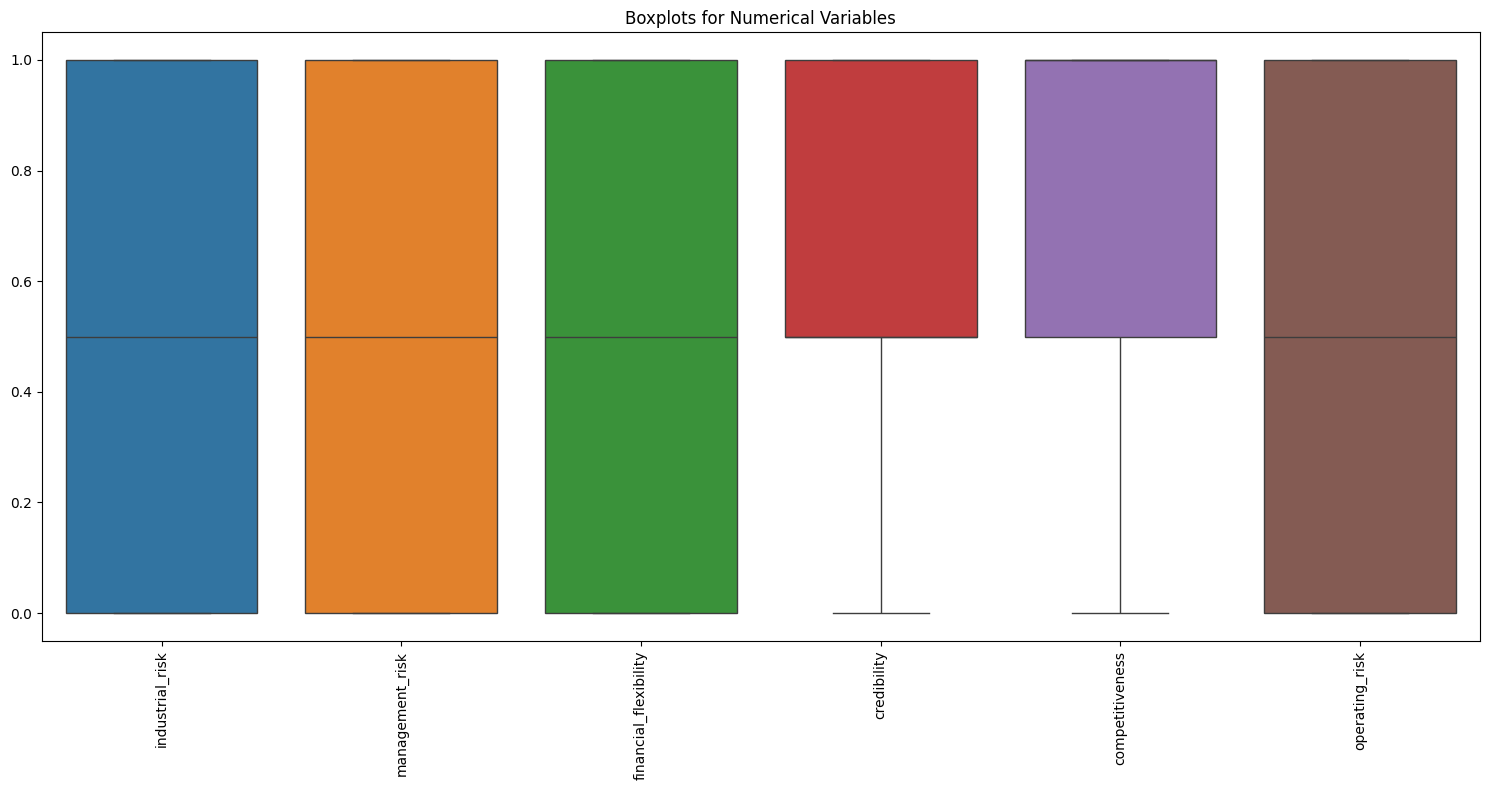

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots for Numerical Variables")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It is intended to summarize the distribution and identify outliers across numerical features.

* Heatmap

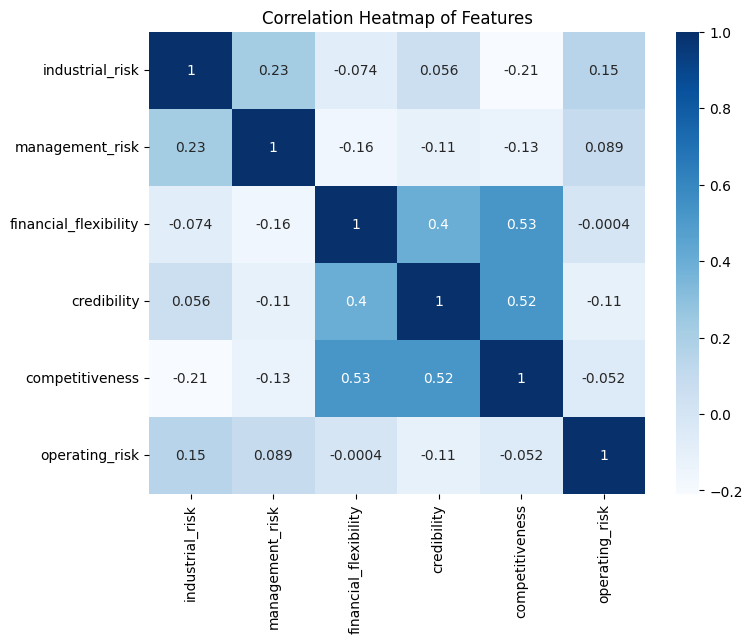

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Features")
plt.show()

Correlation values (from -1 to +1) between the numeric predictor variables.

Color intensity shows how strong the correlation is, with numbers on the grid for precision.

* Pair Plot

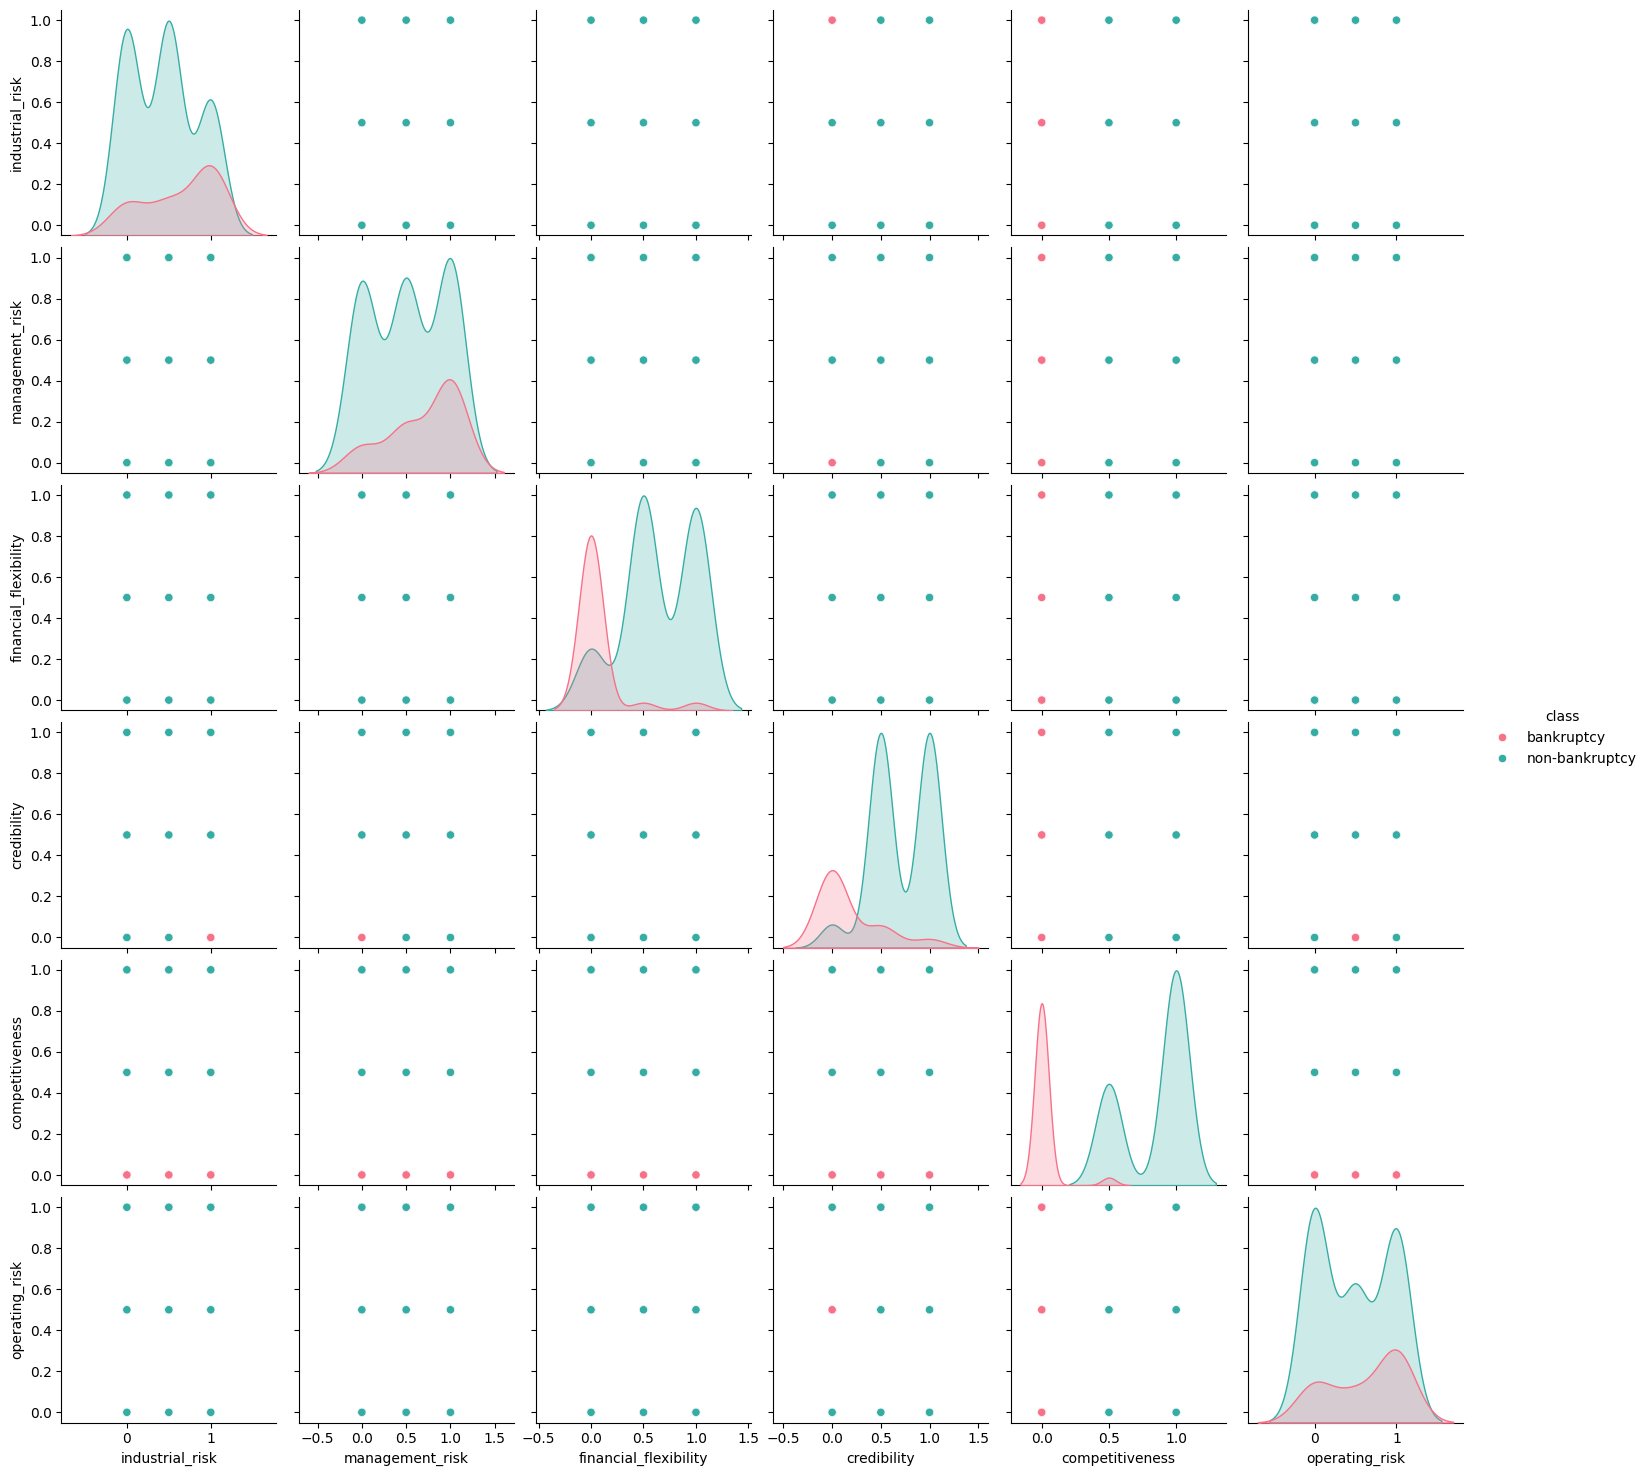

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_features.tolist() + ['class']], hue='class', palette='husl')
plt.show()


Scatter plots for every pair of numeric features, with points colored by class.

Diagonal shows histograms for each feature.

Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Train-Test split after scaling
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nOriginal Training Target Distribution:")
print(y_train.value_counts())

print("\nResampled Training Target Distribution (After SMOTE):")
print(y_train_resampled.value_counts())



Original Training Target Distribution:
class
1    62
0    20
Name: count, dtype: int64

Resampled Training Target Distribution (After SMOTE):
class
1    62
0    62
Name: count, dtype: int64


* Preprocessing:
Label encoding for categorical targets using _LabelEncoder_.
* Data Distribution Insight:
Print statements to display:
Original training target distribution
SMOTE-resampled training target distribution
* Imbalance Handling:
Use of SMOTE to balance classes before training.
* Workflow Implication:
Sets up data preprocessing and class-imbalance handling as a precursor to model training and evaluation.

Models


In [ ]:
from sklearn.neural_network import MLPClassifier

models = {
    'LogisticRegression': {
        'Model': LogisticRegression(random_state=42, max_iter=1000),
        'Params': {
            'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
            'penalty': ['l2'],              # l2 regularization
            'solver': ['liblinear', 'saga']
        }
    },
    'RandomForest': {
        'Model': RandomForestClassifier(random_state=42),
        'Params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'GradientBoostingClassifier': {
        'Model': GradientBoostingClassifier(random_state=42),
        'Params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5]
        }
    },
    'LightGBM': {
        'Model': LGBMClassifier(verbosity=-1, random_state=42),
        'Params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    },
    'XGBoost': {
        'Model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'Params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2]
        }
    },
    'ANN': {
        'Model': MLPClassifier(random_state=42, max_iter=1000),
        'Params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # different architectures
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
            'learning_rate': ['constant', 'adaptive']
        }
    }
}


* LogisticRegression: A linear model for binary classification.
* RandomForest: An ensemble method that builds multiple decision trees.
* GradientBoostingClassifier: Another ensemble method that builds trees sequentially.
* LightGBM: A gradient boosting framework that uses tree-based learning algorithms.
* XGBoost: Another optimized distributed gradient boosting library.
* ANN (Artificial Neural Network): A multi-layer perceptron classifier from sklearn.neural_network.

In [ ]:
# Hyperparameter Tuning
best_models = {}

for name, config in models.items():
    print(f'Tuning {name}...')
    random = RandomizedSearchCV(config['Model'], config['Params'], cv = 5,
                                scoring = 'accuracy', verbose = 0, n_iter = 10)
    random.fit(X_train_resampled, y_train_resampled)
    best_models[name] = random.best_estimator_
    print(f"Best Score for {name}: {random.best_score_:.4f}")
    print(f"Best Params for {name}: {random.best_params_}\n")

Tuning LogisticRegression...
Best Score for LogisticRegression: 1.0000
Best Params for LogisticRegression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

Tuning RandomForest...
Best Score for RandomForest: 1.0000
Best Params for RandomForest: {'n_estimators': 200, 'max_depth': None}

Tuning GradientBoostingClassifier...
Best Score for GradientBoostingClassifier: 1.0000
Best Params for GradientBoostingClassifier: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

Tuning LightGBM...
Best Score for LightGBM: 1.0000
Best Params for LightGBM: {'n_estimators': 100, 'learning_rate': 0.01}

Tuning XGBoost...
Best Score for XGBoost: 1.0000
Best Params for XGBoost: {'n_estimators': 200, 'learning_rate': 0.1}

Tuning ANN...
Best Score for ANN: 1.0000
Best Params for ANN: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}



describes a hyperparameter tuning procedure where, for each model in a collection, a randomized search is conducted to optimize parameters. Specifically, it iterates over models, performs a 5-fold cross-validated randomized search (RandomizedSearchCV) with accuracy as the scoring metric and 10 iterations, using a resampled training set. The best estimator for each model is stored in a dictionary, and after each tuning run, the code prints the model name, its best cross-validated score, and the corresponding best parameters.

In [ ]:
# Make predictions with the best models
lr_pred = best_models['LogisticRegression'].predict(X_val)
rf_pred = best_models['RandomForest'].predict(X_val)
gbm_pred = best_models['GradientBoostingClassifier'].predict(X_val)
lgbm_pred = best_models['LightGBM'].predict(X_val)
xgb_pred = best_models['XGBoost'].predict(X_val)
ann_pred = best_models['ANN'].predict(X_val)

print("Models Performance:")
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_val, gbm_pred))
print("LightGBM Accuracy:", accuracy_score(y_val, lgbm_pred))
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_pred))
print("ANN Accuracy:", accuracy_score(y_val, ann_pred))

Models Performance:
Logistic Regression Accuracy: 0.9523809523809523
Random Forest Accuracy: 0.9523809523809523
Gradient Boosting Accuracy: 0.9523809523809523
LightGBM Accuracy: 0.9523809523809523
XGBoost Accuracy: 0.9523809523809523
ANN Accuracy: 1.0


 the prediction phase using previously tuned models. It applies each best model to the validation set to generate predictions for Logistic Regression, Random Forest, Gradient Boosting, LightGBM, XGBoost, and an artificial neural network (ANN). It then prints the models' performance by computing and displaying accuracy scores against the true validation labels for each model.

ROC curve


Logistic Regression:
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.94      0.97        16

    accuracy                           0.95        21
   macro avg       0.92      0.97      0.94        21
weighted avg       0.96      0.95      0.95        21


Random Forest:
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21


Gradient Boosting:
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0

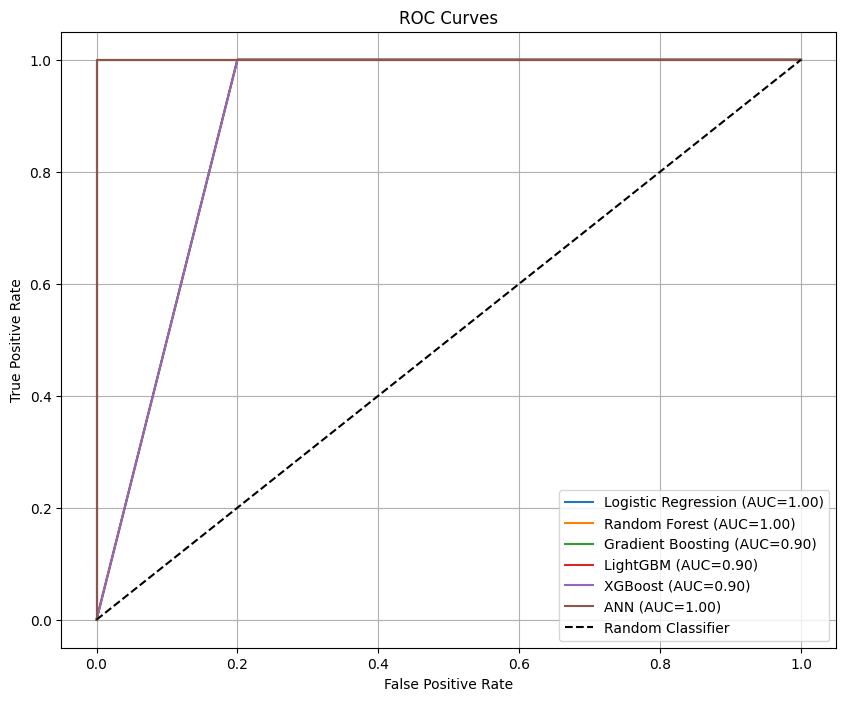

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

models = {
    "Logistic Regression": best_models['LogisticRegression'],
    "Random Forest": best_models['RandomForest'],
    "Gradient Boosting": best_models['GradientBoostingClassifier'],
    "LightGBM": best_models['LightGBM'],
    "XGBoost": best_models['XGBoost'],
    "ANN": best_models['ANN']
}

plt.figure(figsize=(10, 8))

for name, m in models.items():
    y_pred = m.predict(X_val)

    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # Try plotting ROC curve
    try:
        y_proba = m.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_proba)
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')
    except AttributeError:
        print(f"{name} does not support predict_proba; skipping ROC curve.")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

defines a dictionary of trained models (Logistic Regression, Random Forest, Gradient Boosting, LightGBM, XGBoost, and an ANN) and proceeds to plot a ROC curve: it computes and compares performance metrics such as accuracy, classification reports, and ROC metrics, then plots a ROC curve against a random classifier with FPR on the x-axis and TPR on the y-axis, including labels, a legend, grid, and display of the plot.

Coefficient Interpretation

1. Logistic Regression

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_models['LogisticRegression'].coef_[0]
})
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

                 Feature  Coefficient  Odds Ratio
4        competitiveness     0.395524    1.485162
2  financial_flexibility     0.265868    1.304563
3            credibility     0.180454    1.197761
5         operating_risk    -0.041207    0.959630
1        management_risk    -0.054444    0.947012
0        industrial_risk    -0.129857    0.878221


constructs a feature importance table for a Logistic Regression model by pairing each feature with its corresponding coefficient, converting coefficients to odds ratios via the exponential function, and sorting the results in descending order of the coefficients. The resulting DataFrame lists features, their coefficients, and calculated odds ratios, and is then printed to display the ranked feature importance.

2. Tree-Based Models

In [ ]:
tree_models = {
    "Random Forest": best_models['RandomForest'],
    "Gradient Boosting": best_models['GradientBoostingClassifier'],
    "LightGBM": best_models['LightGBM'],
    "XGBoost": best_models['XGBoost']
}

for name, model in tree_models.items():
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importance
        })
        feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

        print(f"\nFeature Importance for {name}:")
        print(feature_importance_df)
    else:
        print(f"\n{name} does not have a feature_importances_ attribute.")


Feature Importance for Random Forest:
                 Feature  Importance
4        competitiveness    0.561024
2  financial_flexibility    0.213328
3            credibility    0.130936
0        industrial_risk    0.057290
5         operating_risk    0.020978
1        management_risk    0.016444

Feature Importance for Gradient Boosting:
                 Feature    Importance
4        competitiveness  1.000000e+00
0        industrial_risk  1.900398e-16
1        management_risk  1.488590e-16
5         operating_risk  4.671881e-17
3            credibility  0.000000e+00
2  financial_flexibility  0.000000e+00

Feature Importance for LightGBM:
                 Feature  Importance
4        competitiveness         100
0        industrial_risk          48
1        management_risk          28
3            credibility          23
5         operating_risk          12
2  financial_flexibility           8

Feature Importance for XGBoost:
                 Feature  Importance
4        competitivenes

iterates over a set of tree-based models (Random Forest, Gradient Boosting, LightGBM, and XGBoost) and, for each model that provides feature_importances_, constructs and sorts a DataFrame linking features to their importance scores. It then prints a labeled, ranked list of feature importances for each model; if a model lacks the feature_importances_ attribute, it reports that the model does not have this attribute.

3. ANN Model

In [ ]:
from sklearn.inspection import permutation_importance

ann_model = best_models['ANN']


result = permutation_importance(ann_model, X_val, y_val, n_repeats=10, random_state=42, scoring='accuracy')

# Create a DataFrame to display the results
permutation_importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
})

# Sort by importance mean
permutation_importance_df.sort_values(by='Importance Mean', ascending=False, inplace=True)

print("Permutation Importance for ANN Model:")
print(permutation_importance_df)

Permutation Importance for ANN Model:
                 Feature  Importance Mean  Importance Std
4        competitiveness         0.176190        0.064065
3            credibility         0.071429        0.038392
2  financial_flexibility         0.066667        0.031587
5         operating_risk         0.038095        0.028571
1        management_risk         0.000000        0.000000
0        industrial_risk         0.000000        0.000000


describes computing permutation-based feature importance for an artificial neural network (ANN). It uses sklearn’s permutation_importance to evaluate how shuffling each feature in the validation set affects the ANN’s accuracy, with 10 repeats and a fixed random seed. The results are organized into a DataFrame that lists each feature with its mean and standard deviation of importance, then the features are sorted by their mean importance in descending order. The final output is a printed table labeled “Permutation Importance for ANN Model” showing the ranked feature importances.

In [ ]:
# 9. Save model
import joblib
joblib.dump(best_models['LogisticRegression'], "bankruptcy_model.pkl")
print("Logistic Regression model saved as bankruptcy_model.pkl")

Logistic Regression model saved as bankruptcy_model.pkl


 describes saving a trained model to disk using Python's joblib library. It calls joblib.dump(model, "bankruptcy_model.pkl") to serialize and store the model in a file named bankruptcy_model.pkl.